In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv = 'Irrigation_Scheduling.csv'
df=pd.read_csv(csv)
df

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24
...,...,...,...,...,...,...,...,...,...,...
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24


In [4]:
df.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4682.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,-14.291506,243.692406,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,2.649815,76.176855,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,-17.610000,-243.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,-16.340000,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,-13.470000,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,-12.950000,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,116.700000,480.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4688 non-null   int64  
 1   temperature   4688 non-null   float64
 2   pressure      4688 non-null   float64
 3   altitude      4682 non-null   float64
 4   soilmiosture  4688 non-null   int64  
 5   note          4688 non-null   int64  
 6   status        4688 non-null   int64  
 7   class         4688 non-null   object 
 8   date          4688 non-null   object 
 9   time          4688 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 366.4+ KB


In [6]:
#To return the number of unique values for each column
df.nunique()

id              4688
temperature      426
pressure        2593
altitude         555
soilmiosture     262
note               4
status             2
class              4
date               1
time               1
dtype: int64

In [7]:
df.count()
df.drop("id",axis=1,inplace=True)

In [8]:
df.isna()

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4683,False,False,False,False,False,False,False,False,False
4684,False,False,False,False,False,False,False,False,False
4685,False,False,False,False,False,False,False,False,False
4686,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

temperature     0
pressure        0
altitude        6
soilmiosture    0
note            0
status          0
class           0
date            0
time            0
dtype: int64

In [10]:
df['altitude'].fillna(int(df['altitude'].mean()),inplace=True)

In [11]:
df['altitude'].isna().sum()

0

In [12]:
df['class'].value_counts()

Very Wet    1842
Wet         1457
Very Dry    1023
Dry          366
Name: class, dtype: int64

In [13]:
df.groupby('class').size()

class
Dry          366
Very Dry    1023
Very Wet    1842
Wet         1457
dtype: int64

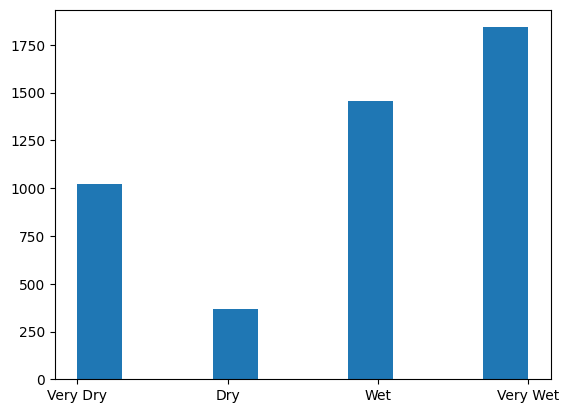

In [14]:
import matplotlib.pyplot as plt
plt.hist(df['class'])
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['class']=onehot_encoder.fit_transform(df[['class']]).toarray()
df['class'].values

array([0., 0., 0., ..., 1., 1., 1.])

In [16]:
data=df.iloc[:,0:7].corr()
data

,temperature,pressure,altitude,soilmiosture,note,status,class
temperature,1.000000,0.069229,0.290575,-0.139279,0.034205,0.028588,-0.027064
pressure,0.069229,1.000000,0.695914,-0.054813,-0.007703,0.003589,-0.003265
altitude,0.290575,0.695914,1.000000,-0.134397,0.076287,0.087809,-0.112191
soilmiosture,-0.139279,-0.054813,-0.134397,1.000000,-0.969905,-0.894602,0.291649
note,0.034205,-0.007703,0.076287,-0.969905,1.000000,0.908939,-0.221729
status,0.028588,0.003589,0.087809,-0.894602,0.908939,1.000000,-0.448475
class,-0.027064,-0.003265,-0.112191,0.291649,-0.221729,-0.448475,1.000000


In [17]:
print(df)

      temperature  pressure  altitude  soilmiosture  note  status  class  \
0           29.10   9984.53    -12.21           377     0       0    0.0   
1           29.08   9984.36    -12.22           379     0       0    0.0   
2           29.06   9984.56    -12.20           376     0       0    0.0   
3           29.05   9984.39    -12.22           377     0       0    0.0   
4           29.03   9984.42    -12.21           379     0       0    0.0   
...           ...       ...       ...           ...   ...     ...    ...   
4683        29.34   9921.75    -17.49           327     1       0    1.0   
4684        29.31   9921.45    -17.52           328     1       0    1.0   
4685        29.29   9921.48    -17.51           328     1       0    1.0   
4686        29.26   9921.51    -17.51           327     1       0    1.0   
4687        29.28   9922.20    -17.45           323     1       0    1.0   

            date      time  
0     08-10-2022  22:06:24  
1     08-10-2022  22:06:24  


<AxesSubplot: >

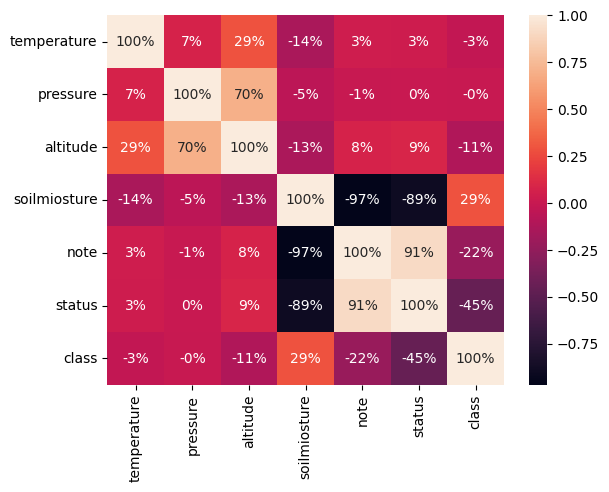

In [18]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data,annot=True,fmt='.0%')

In [19]:
#Dividing data into X and Y(converting into numpy)
X=df.iloc[:,0:4].values  #Independent dataset 
Y=df.iloc[:,6].values    #Dependent dataset 

In [20]:
print(X)
print(Y)

[[  29.1  9984.53  -12.21  377.  ]
 [  29.08 9984.36  -12.22  379.  ]
 [  29.06 9984.56  -12.2   376.  ]
 ...
 [  29.29 9921.48  -17.51  328.  ]
 [  29.26 9921.51  -17.51  327.  ]
 [  29.28 9922.2   -17.45  323.  ]]
[0. 0. 0. ... 1. 1. 1.]


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Fitting the Logistic Regression model on X and Y
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [24]:
pred1=model1.predict(X_test)

In [25]:
print(pred1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred1)

0.9093816631130064

In [27]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred1))

[[853   0]
 [ 85   0]]


In [28]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [29]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
    return np.array(sequences)

sequence_length = 50  # Tamanho da sequência
X_train_sequences = create_sequences(X_train, sequence_length)
Y_train_sequences = Y_train[sequence_length:]  # Ajustar os rótulos correspondentes


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Supondo que você tem dados de treinamento (X_train) e rótulos (Y_train)

# Defina o formato da entrada
input_shape = (50, 4)  # timesteps é o tamanho da janela deslizante

# Crie o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=input_shape, activation='relu'))
model.add(Dense(1))  # 1 saída para a previsão de irrigação

# Compile o modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Use a métrica apropriada para sua tarefa

# Treine o modelo
model.fit(X_train_sequences, Y_train_sequences, epochs=50, batch_size=32)  #

Epoch 1/50
116/116 [==============================] - 4s 18ms/step - loss: 0.0713
Epoch 2/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0701
Epoch 3/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0698
Epoch 4/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0699
Epoch 5/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0696
Epoch 6/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0697
Epoch 7/50
116/116 [==============================] - 2s 19ms/step - loss: 0.0697
Epoch 8/50
116/116 [==============================] - 2s 19ms/step - loss: 0.0695
Epoch 9/50
116/116 [==============================] - 2s 19ms/step - loss: 0.0696
Epoch 10/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0693
Epoch 11/50
116/116 [==============================] - 2s 18ms/step - loss: 0.0695
Epoch 12/50
116/116 [==============================] - 2s 19ms/step - loss: 0.0693
Epoch 13/50
1

In [31]:
predictions = model.predict(X_train_sequences)

116/116 [==============================] - 1s 9ms/step


In [32]:
print(predictions)

[[-0.05893053]
 [-0.03750066]
 [ 0.07158703]
 ...
 [ 0.10174753]
 [ 0.08092026]
 [ 0.08660115]]


In [33]:
for i in range(len(predictions)):
    last_value = X_train_sequences[i+sequence_length][-1][-1]
    real_value = df.iloc[i+sequence_length, 1]  # Supondo que a coluna de valores reais seja a última coluna no DataFrame
    print(f"Previsão: {predictions[i][0]} - Valor Real (do DataFrame): {real_value}")

Previsão: -0.05893053114414215 - Valor Real (do DataFrame): 9984.23
Previsão: -0.037500664591789246 - Valor Real (do DataFrame): 9984.61
Previsão: 0.07158703356981277 - Valor Real (do DataFrame): 9984.83
Previsão: 0.025353357195854187 - Valor Real (do DataFrame): 9984.84
Previsão: 0.09728136658668518 - Valor Real (do DataFrame): 9984.89
Previsão: 0.06287980824708939 - Valor Real (do DataFrame): 9984.77
Previsão: 0.013860094361007214 - Valor Real (do DataFrame): 9984.61
Previsão: 0.032548025250434875 - Valor Real (do DataFrame): 9984.85
Previsão: 0.09724404662847519 - Valor Real (do DataFrame): 9984.9
Previsão: 0.11875832080841064 - Valor Real (do DataFrame): 9984.77
Previsão: 0.101870097219944 - Valor Real (do DataFrame): 9984.78
Previsão: 0.019523805007338524 - Valor Real (do DataFrame): 9984.65
Previsão: 0.008400370366871357 - Valor Real (do DataFrame): 9984.52
Previsão: 0.031287871301174164 - Valor Real (do DataFrame): 9984.36
Previsão: -0.028767935931682587 - Valor Real (do DataFra

IndexError: index 3700 is out of bounds for axis 0 with size 3700

[-0.94868746 -0.45060531  0.08679912 ... -0.90936518 -0.94868746
  1.25335994]


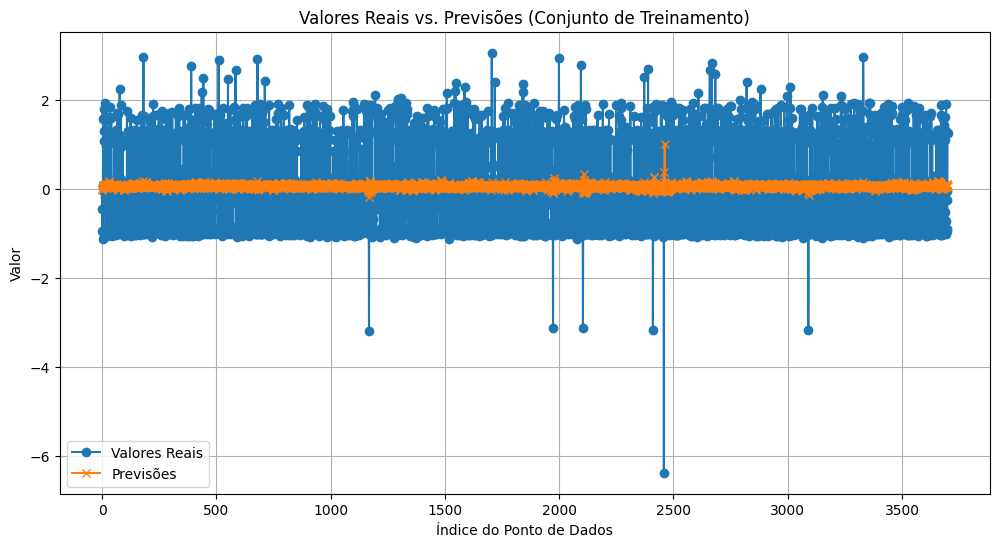

In [ ]:
import matplotlib.pyplot as plt

# Suponha que você tenha as sequências de treinamento originais (X_train_sequences) e as previsões (predictions)
real_values = X_train_sequences[:, -1, -1]
print(real_values)
plt.figure(figsize=(12, 6))
plt.plot(real_values, label='Valores Reais', marker='o')
plt.plot(predictions, label='Previsões', marker='x')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Valor')
plt.legend()
plt.title('Valores Reais vs. Previsões (Conjunto de Treinamento)')
plt.grid(True)
plt.show()